In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from random import choices
from collections import Counter

from scipy.interpolate import make_interp_spline, BSpline

In [2]:
# Import model specific libraries
import Prices
import StationV6 as Station

In [3]:


station1 = Station.Station()

In [22]:
# Setup the station
electrolyser_capacity = 22.125*1
station_capacity = 9999
storage_capacity = 9.5*30

dispenser_time_demand = [4]

day = 1

elec_price = Prices.elec_prices_data(day)
starting_storage_level = 0

dispenser_demand = np.zeros(48)
for z in range(len(dispenser_time_demand)):
    dispenser_demand[dispenser_time_demand[z]] += 1
dispenser_demand = dispenser_demand * 32.09

demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

electric_dispenser_demand = []
for n in range(len(dispenser_time_demand)):
    for q in range(5):
        electric_dispenser_demand = np.append(electric_dispenser_demand, dispenser_time_demand[n]+q)
        
electric_dispenser_demand = electric_dispenser_demand.astype(int)
        
electric_total_dispenser_demand = np.zeros(48)
for z in range(len(electric_dispenser_demand)):
    electric_total_dispenser_demand[electric_dispenser_demand[z]] += 1
electric_total_dispenser_demand = electric_total_dispenser_demand*120



Text(24, 40, 'Electrolyser Capacity = 22.12. Storage Capacity = 285.0')

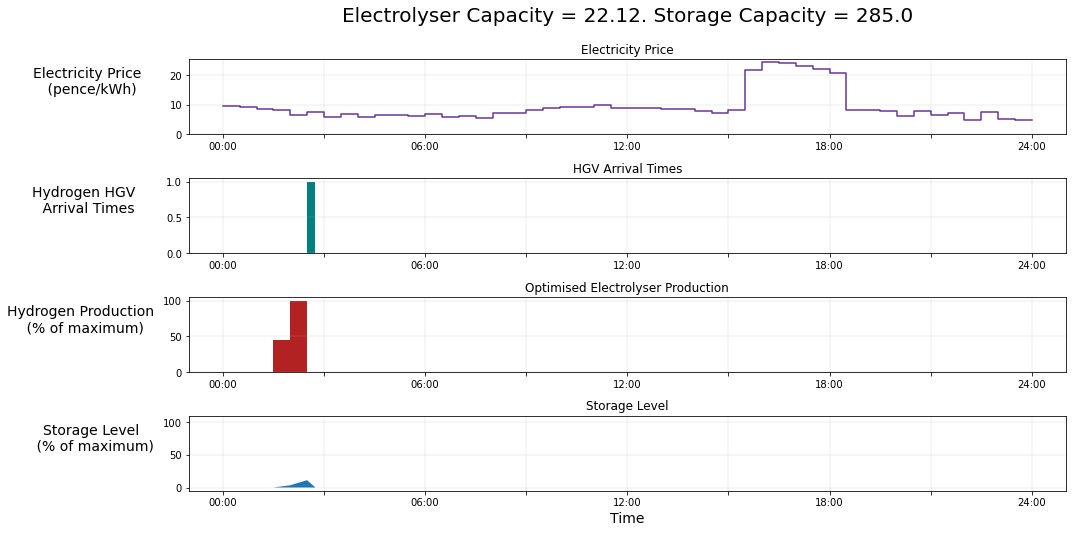

In [23]:
new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])

demand2 = np.zeros(2*len(demand)+2)
dispenser_demand2 = np.zeros(2*len(dispenser_demand)+2)

for n in range(len(demand)):
    demand2[2*n] = demand[n]/2
    demand2[2*n+1] = demand[n]/2
    dispenser_demand2[2*n+2] = dispenser_demand[n]
    
combined = np.zeros(len(demand2)+2)

for n in range(len(demand2)):
    combined[n] = demand2[n] - dispenser_demand2[n]
    
length = len(combined)
iterations = 100
total_length = length*iterations

integration = np.zeros(total_length)

for i in range(length):
    for j in range(iterations):
        if i == 0 and j == 0:
            integration[i*iterations+j] = combined[i]/iterations
        else:
            integration[i*iterations+j] = integration[i*iterations+j-1] + combined[i]/iterations
    
x = np.array([n for n in range(48)])

fig, ax = plt.subplots(4,1, figsize=[15,7])

for n in range(len(ax)):
    my_xticks = [0,6,12,18,24,30,36,42,48]
    my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
    ax[n].set_xticks(my_xticks)
    ax[n].set_xticklabels(my_xticks_names)

new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])
    
ax[0].title.set_text('Electricity Price')
ax[0].step(x_n, new_elec_price, color='rebeccapurple')
ax[0].set_ylim(min(0, np.min(new_elec_price)))
ax[0].set_xlim(-2,50)
ax[0].set_ylabel('Electricity Price \n (pence/kWh)',fontsize=14,rotation=0, labelpad=80)
ax[0].grid(lw=0.2)


ax[1].title.set_text('HGV Arrival Times')
ax[1].bar(x+1, dispenser_demand/32.09, color='teal',width=0.45, align='edge')
ax[1].set_ylabel('Hydrogen HGV \n Arrival Times',fontsize=14,rotation=0, labelpad=80)
ax[1].grid(lw=0.2)
ax[1].set_xlim(-2,50)

ax[2].title.set_text('Optimised Electrolyser Production')
ax[2].bar(x, demand/electrolyser_capacity*100, color='firebrick',width=1,align='edge')
ax[2].set_ylabel('Hydrogen Production \n (% of maximum)',fontsize=14,rotation=0, labelpad=80)
ax[2].grid(lw=0.2)
ax[2].set_xlim(-2,50)

q = [n for n in range(len(integration))]

ax[3].title.set_text('Storage Level')
ax[3].fill(q, integration/storage_capacity*100)
ax[3].set_ylim(-5,110)
ax[3].set_xlim(-200*2,5000*2)
ax[3].set_ylabel('Storage Level \n (% of maximum)',fontsize=14,rotation=0, labelpad=70)
ax[3].grid(lw=0.2)
my_xticks = [0,600*2,1200*2,1800*2,2400*2,3000*2,3600*2,4200*2,4800*2]
my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
ax[3].set_xticks(my_xticks)
ax[3].set_xticklabels(my_xticks_names)
ax[3].set_xlabel('Time',fontsize=14)


fig.tight_layout()
ax[0].text(24,40,('Electrolyser Capacity = '+str(round(electrolyser_capacity,2))+'. Storage Capacity = '+str(round(storage_capacity,2))),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')

Text(24, 40, 'Electrolyser Capacity = 22.12. Storage Capacity = 285.0')

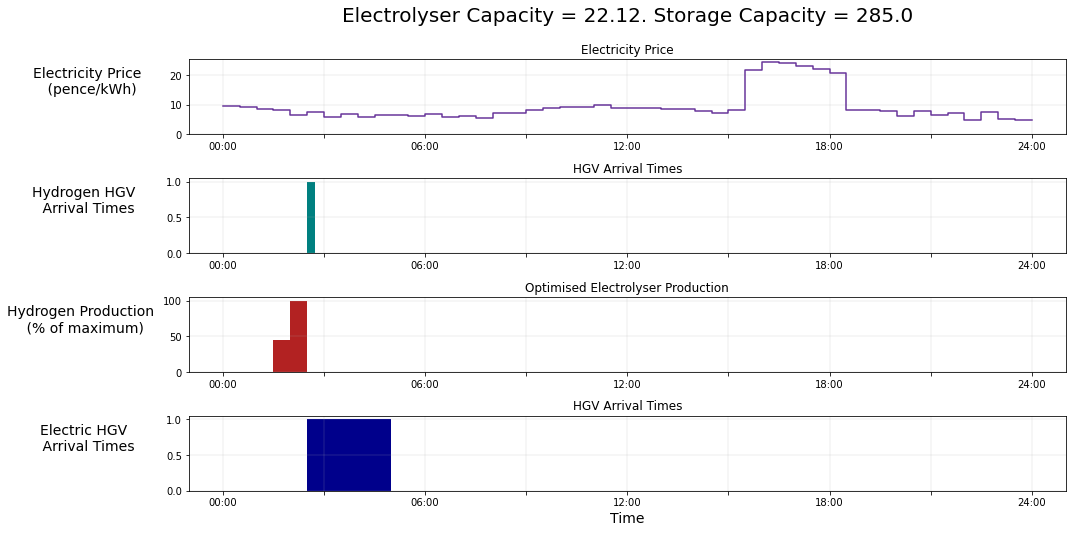

In [24]:
new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])

demand2 = np.zeros(2*len(demand)+2)
dispenser_demand2 = np.zeros(2*len(dispenser_demand)+2)

for n in range(len(demand)):
    demand2[2*n] = demand[n]/2
    demand2[2*n+1] = demand[n]/2
    dispenser_demand2[2*n+2] = dispenser_demand[n]
    
combined = np.zeros(len(demand2)+2)

for n in range(len(demand2)):
    combined[n] = demand2[n] - dispenser_demand2[n]
    
length = len(combined)
iterations = 100
total_length = length*iterations

integration = np.zeros(total_length)

for i in range(length):
    for j in range(iterations):
        if i == 0 and j == 0:
            integration[i*iterations+j] = combined[i]/iterations
        else:
            integration[i*iterations+j] = integration[i*iterations+j-1] + combined[i]/iterations
    
x = np.array([n for n in range(48)])

fig, ax = plt.subplots(4,1, figsize=[15,7])

for n in range(len(ax)):
    my_xticks = [0,6,12,18,24,30,36,42,48]
    my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
    ax[n].set_xticks(my_xticks)
    ax[n].set_xticklabels(my_xticks_names)

new_elec_price = np.insert(elec_price,0,elec_price[0])
x_n = np.array([n for n in range(49)])
    
ax[0].title.set_text('Electricity Price')
ax[0].step(x_n, new_elec_price, color='rebeccapurple')
ax[0].set_ylim(min(0, np.min(new_elec_price)))
ax[0].set_xlim(-2,50)
ax[0].set_ylabel('Electricity Price \n (pence/kWh)',fontsize=14,rotation=0, labelpad=80)
ax[0].grid(lw=0.2)


ax[1].title.set_text('HGV Arrival Times')
ax[1].bar(x+1, dispenser_demand/32.09, color='teal',width=0.45, align='edge')
ax[1].set_ylabel('Hydrogen HGV \n Arrival Times',fontsize=14,rotation=0, labelpad=80)
ax[1].grid(lw=0.2)
ax[1].set_xlim(-2,50)

ax[2].title.set_text('Optimised Electrolyser Production')
ax[2].bar(x, demand/electrolyser_capacity*100, color='firebrick',width=1,align='edge')
ax[2].set_ylabel('Hydrogen Production \n (% of maximum)',fontsize=14,rotation=0, labelpad=80)
ax[2].grid(lw=0.2)
ax[2].set_xlim(-2,50)

q = [n for n in range(len(integration))]

ax[3].title.set_text('HGV Arrival Times')
# ax[3].fill(q, integration/storage_capacity*100)
# ax[3].set_ylim(-5,110)
# ax[3].set_xlim(-200*2,5000*2)
# ax[3].set_ylabel('Storage Level \n (% of maximum)',fontsize=14,rotation=0, labelpad=70)
ax[3].grid(lw=0.2)
ax[3].set_ylabel('Electric HGV \n Arrival Times',fontsize=14,rotation=0, labelpad=80)
# my_xticks = [0,600*2,1200*2,1800*2,2400*2,3000*2,3600*2,4200*2,4800*2]
# my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
# ax[3].set_xticks(my_xticks)
# ax[3].set_xticklabels(my_xticks_names)
ax[3].set_xlabel('Time',fontsize=14)
ax[3].bar(x+1, electric_total_dispenser_demand/120, width=1, align='edge', color='darkblue')
ax[3].set_xlim(-2,50)



fig.tight_layout()
ax[0].text(24,40,('Electrolyser Capacity = '+str(round(electrolyser_capacity,2))+'. Storage Capacity = '+str(round(storage_capacity,2))),fontsize=20,
     horizontalalignment='center',
     verticalalignment='center')

In [25]:
elec_price = elec_price/100
demand = demand*51.38
hydrogen_cost = np.dot(demand, elec_price)
electric_cost = np.dot(electric_total_dispenser_demand, elec_price)
print(hydrogen_cost/len(dispenser_time_demand))
print(electric_cost/len(dispenser_time_demand))

118.32472323000002
39.69


# Comparison

In [34]:
# Setup the station
electrolyser_capacity = 22.125*2
station_capacity = 9999
storage_capacity = 9.5*60





# yearly simulation
hydrogen_array = np.zeros(365)
electric_array = np.zeros(365)




dispenser_time_demand = [n for n in range(4, 48, 2)]

for hello in range(365):

    day = hello+1

    elec_price = Prices.elec_prices_data(day)
    starting_storage_level = 0

    dispenser_demand = np.zeros(48)
    for z in range(len(dispenser_time_demand)):
        dispenser_demand[dispenser_time_demand[z]] += 1
    dispenser_demand = dispenser_demand * 32.09

    demand, level, unsatisfied = station1.get_optimised_electrolyser_demand(elec_price, dispenser_time_demand, starting_storage_level,electrolyser_capacity,storage_capacity)

    electric_dispenser_demand = []
    for n in range(len(dispenser_time_demand)):
        for q in range(5):
            electric_dispenser_demand = np.append(electric_dispenser_demand, dispenser_time_demand[n]+q)

    electric_dispenser_demand = electric_dispenser_demand.astype(int)

    electric_total_dispenser_demand = np.zeros(52)
    for z in range(len(electric_dispenser_demand)):
        electric_total_dispenser_demand[electric_dispenser_demand[z]] += 1
    electric_total_dispenser_demand = electric_total_dispenser_demand*120

    # convert demand to kWh
    demand = demand*51.38

    # convert elec price to pounds
    elec_price = elec_price/100

    # find out refill cost for that day
    hydrogen_cost = np.dot(demand, elec_price)

    for ty in range(4):
        if ty ==0:
            new_elec_price = np.append(elec_price, elec_price[-1])
        else:
            new_elec_price = np.append(new_elec_price, new_elec_price[-1])

    electric_cost = np.dot(electric_total_dispenser_demand, new_elec_price)

    # find average refill costs for that day
    avg_hydrogen_cost = hydrogen_cost/len(dispenser_time_demand)
    avg_electric_cost = electric_cost/len(dispenser_time_demand)

    hydrogen_array[hello] = avg_hydrogen_cost
    electric_array[hello] = avg_electric_cost





In [35]:
print(unsatisfied)
print(np.average(hydrogen_array))
print(np.average(electric_array))

0
88.13782670609517
55.64755636363636


In [10]:
hydrogen_average = np.zeros(48)
electric_average = np.zeros(48)
for n in range(48):
    if n <= 3:
        continue
    else:
        hydrogen_average[n] = np.average(hydrogen_array[n])
        electric_average[n] = np.average(electric_array[n])

In [11]:
from scipy.interpolate import make_interp_spline, BSpline
x = [n for n in range(48)]

x_new = np.linspace(np.min(x), np.max(x), 300) 
spl_1 = make_interp_spline(x, hydrogen_average, k=1)
hydrogen_smooth = spl_1(x_new)

spl_2 = make_interp_spline(x, electric_average, k=1)
electric_smooth = spl_2(x_new)

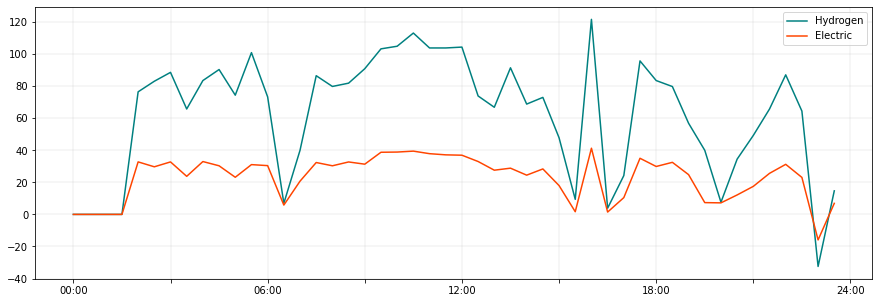

In [12]:
x = [n for n in range(48)]

fig, ax = plt.subplots(figsize=[15,5])

ax.plot(x, hydrogen_average, label='Hydrogen', color='teal')
ax.plot(x, electric_average, label='Electric', color='orangered')
my_xticks = [0,6,12,18,24,30,36,42,48]
my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)
ax.legend()
ax.grid(lw=0.2)

(0.0, 124.49497287212169)

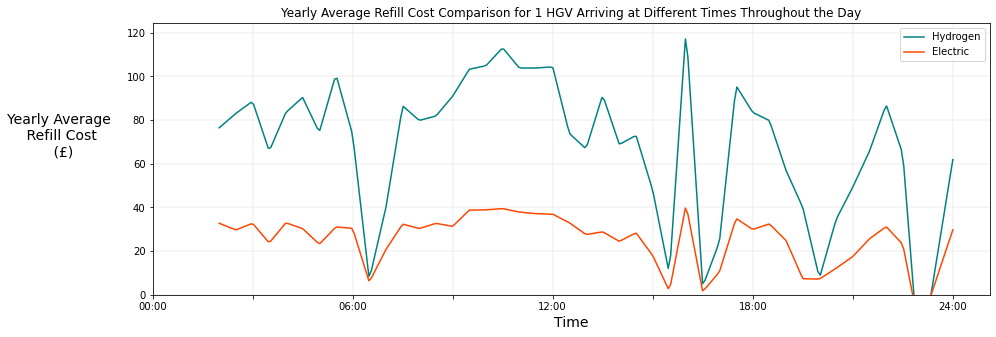

In [13]:
from scipy.interpolate import make_interp_spline, BSpline
x = [n for n in range(48)]

x_new = np.linspace(np.min(x), np.max(x), 300) 
x_new = np.linspace(4, 48, 300) 
spl_1 = make_interp_spline(x, hydrogen_average, k=1)
hydrogen_smooth = spl_1(x_new)

spl_2 = make_interp_spline(x, electric_average, k=1)
electric_smooth = spl_2(x_new)

fig, ax = plt.subplots(figsize=[15,5])

ax.plot(x_new, hydrogen_smooth, label='Hydrogen', color='teal')
ax.plot(x_new, electric_smooth, label='Electric', color='orangered')
my_xticks = [0,6,12,18,24,30,36,42,48]
my_xticks_names = ['00:00','','06:00','','12:00','','18:00','','24:00']
ax.set_xticks(my_xticks)
ax.set_xticklabels(my_xticks_names)
ax.legend()
ax.grid(lw=0.2)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Yearly Average \n Refill Cost \n (£)', fontsize=14, rotation=0, labelpad=65)
ax.title.set_text('Yearly Average Refill Cost Comparison for 1 HGV Arriving at Different Times Throughout the Day')
ax.set_ylim(0)

In [14]:
elec_price

array([0.12348 , 0.126   , 0.12012 , 0.11886 , 0.1092  , 0.11361 ,
       0.1008  , 0.11193 , 0.1008  , 0.10311 , 0.11802 , 0.12012 ,
       0.1197  , 0.1197  , 0.13104 , 0.11025 , 0.11613 , 0.13062 ,
       0.13209 , 0.13146 , 0.13083 , 0.12516 , 0.12894 , 0.12978 ,
       0.1323  , 0.14406 , 0.13356 , 0.14196 , 0.1365  , 0.1302  ,
       0.14112 , 0.2772  , 0.349965, 0.349965, 0.349965, 0.3465  ,
       0.30534 , 0.168   , 0.14784 , 0.1302  , 0.1239  , 0.13041 ,
       0.13041 , 0.12789 , 0.12159 , 0.1386  , 0.14511 , 0.126   ])

In [15]:
new_elec_price = np.append(elec_price, elec_price[-1])
new_elec_price

array([0.12348 , 0.126   , 0.12012 , 0.11886 , 0.1092  , 0.11361 ,
       0.1008  , 0.11193 , 0.1008  , 0.10311 , 0.11802 , 0.12012 ,
       0.1197  , 0.1197  , 0.13104 , 0.11025 , 0.11613 , 0.13062 ,
       0.13209 , 0.13146 , 0.13083 , 0.12516 , 0.12894 , 0.12978 ,
       0.1323  , 0.14406 , 0.13356 , 0.14196 , 0.1365  , 0.1302  ,
       0.14112 , 0.2772  , 0.349965, 0.349965, 0.349965, 0.3465  ,
       0.30534 , 0.168   , 0.14784 , 0.1302  , 0.1239  , 0.13041 ,
       0.13041 , 0.12789 , 0.12159 , 0.1386  , 0.14511 , 0.126   ,
       0.126   ])